In [164]:
i for i in range(10)


SyntaxError: invalid syntax (261193236.py, line 1)

# Imports

In [159]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import pydataset
import os

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Q1 
- Clustering with the Iris Dataset

- Using this lesson as a guide, perform clustering on the iris dataset.


In [126]:
from pydataset import data

iris = data("iris")

iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


## Choose features other than the ones used in the lesson.


In [127]:
iris[["Sepal.Length", "Sepal.Width"]].head(3)

,Sepal.Length,Sepal.Width
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2


In [128]:
iris[["Petal.Length", "Petal.Width"]].head(3)

,Petal.Length,Petal.Width
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2


In [129]:
iris[["Sepal.Width", "Petal.Width"]].head(3)

,Sepal.Width,Petal.Width
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2


## Visualize the results of your clustering.


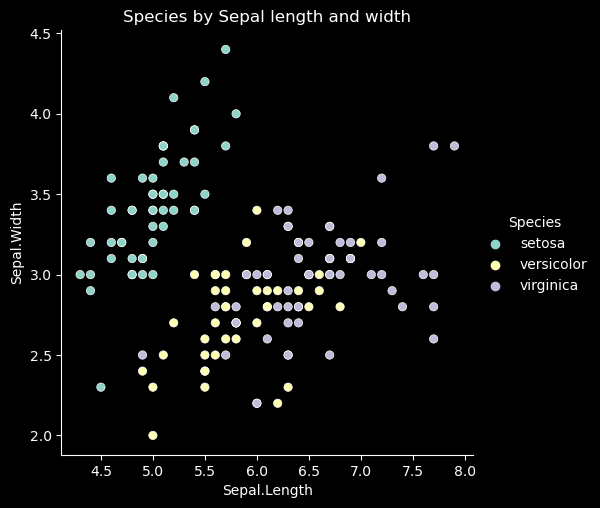

In [130]:
sns.relplot(data=iris, x="Sepal.Length", y="Sepal.Width", hue="Species")
plt.title('Species by Sepal length and width')
plt.show()

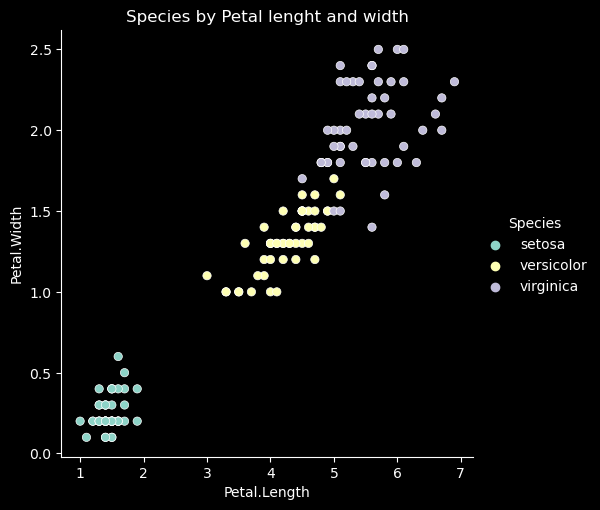

In [131]:
sns.relplot(data=iris, x="Petal.Length", y="Petal.Width", hue="Species")
plt.title('Species by Petal lenght and width')
plt.show()

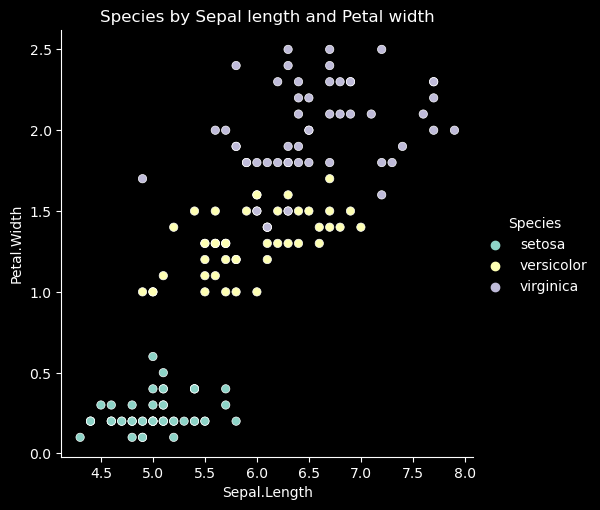

In [132]:
sns.relplot(data=iris, x="Sepal.Length", y="Petal.Width", hue="Species")
plt.title('Species by Sepal length and Petal width')
plt.show()

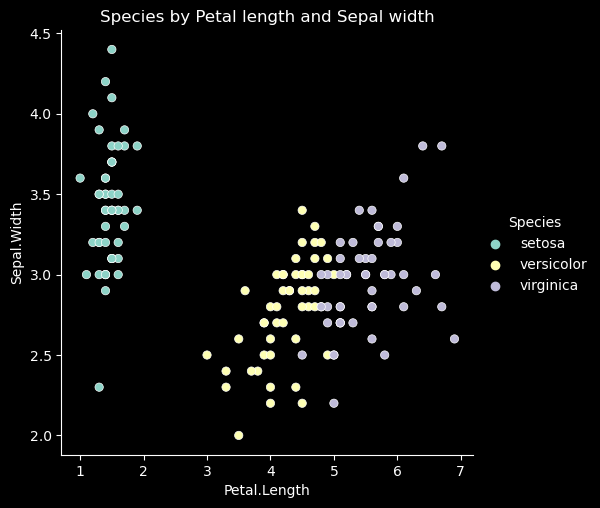

In [133]:
sns.relplot(data=iris, x="Petal.Length", y="Sepal.Width", hue="Species")
plt.title("Species by Petal length and Sepal width")
plt.show()

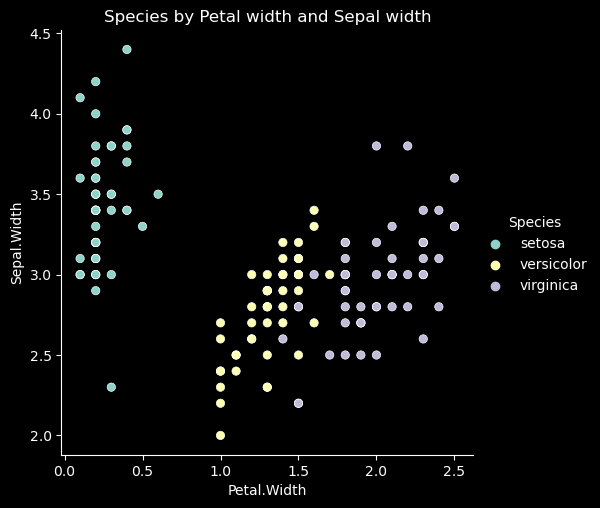

In [134]:
sns.relplot(data=iris, x="Petal.Width", y="Sepal.Width", hue="Species")
plt.title("Species by Petal width and Sepal width")
plt.show()

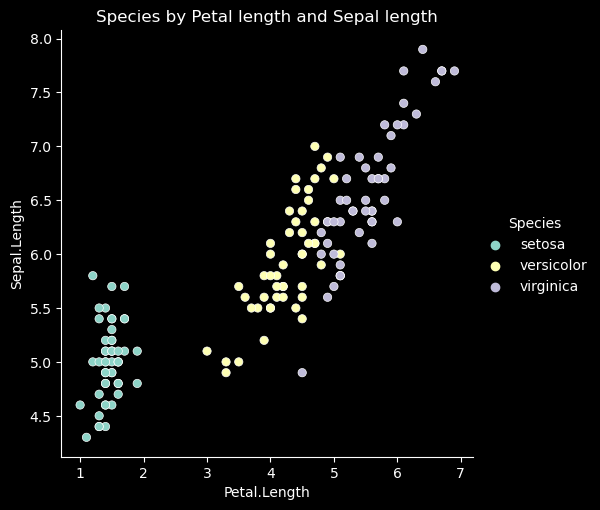

In [135]:
sns.relplot(data=iris, x="Petal.Length", y="Sepal.Length", hue="Species")
plt.title("Species by Petal length and Sepal length")
plt.show()

# Use the elbow method to visually select a good value for k.


In [136]:
x = iris[["Sepal.Length", "Sepal.Width"]] # data to use 

x.head(3) # verity 

,Sepal.Length,Sepal.Width
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2


Text(0.5, 1.0, 'Change in inertia as k increases')

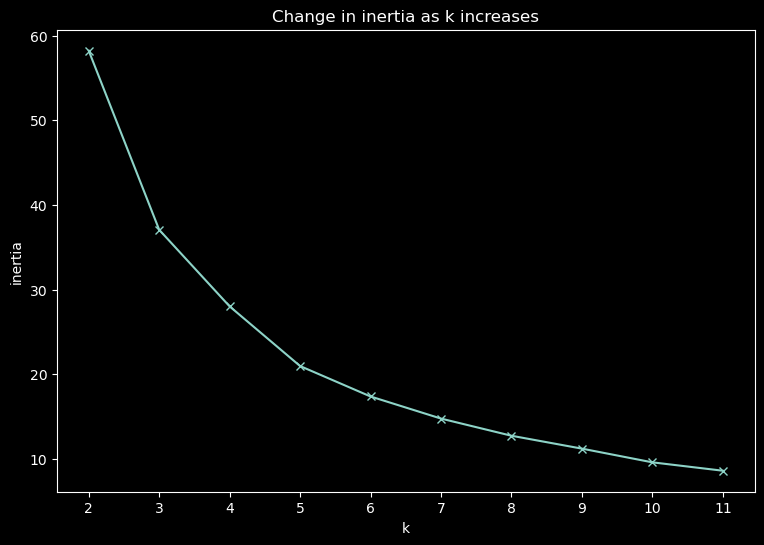

In [137]:
plt.figure(figsize=(9, 6)) # creating the figuer
pd.Series({k: KMeans(k).fit(x).inertia_ for k in range(2, 12)}).plot(marker='x') 
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')

In [138]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

kmeans.predict(x)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [139]:
iris['cluster_sepal'] = kmeans.predict(x)

iris.sample(3)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster_sepal
117,6.5,3.0,5.5,1.8,virginica,1
53,6.9,3.1,4.9,1.5,versicolor,1
140,6.9,3.1,5.4,2.1,virginica,1


In [167]:
iris.groupby('Species').mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,cluster_sepal,cluster_u
Species,,,,,,
setosa,5.006,3.428,1.462,0.246,2.00,1.00
versicolor,5.936,2.770,4.260,1.326,0.24,0.08
virginica,6.588,2.974,5.552,2.026,0.70,1.80


In [ ]:
for name, subset in iris.groupby('Species'):
    

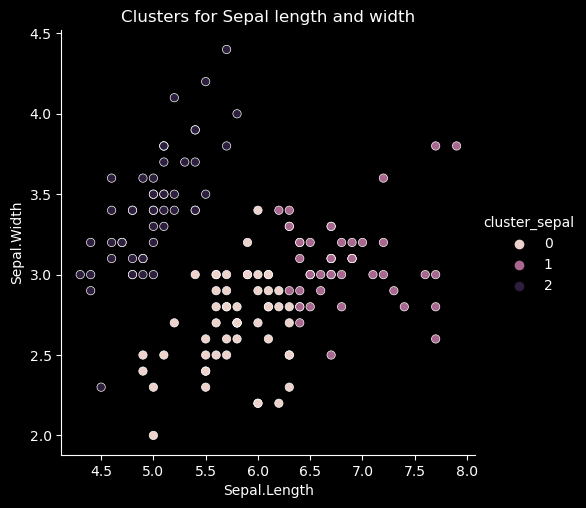

In [140]:
sns.relplot(data=iris, x="Sepal.Length", y="Sepal.Width", hue="cluster_sepal")
plt.title('Clusters for Sepal length and width')
plt.show()

# Repeat the clustering, this time with 3 different features.

In [141]:
u = iris[["Petal.Length", "Petal.Width", "Sepal.Width"]]

u.head()

,Petal.Length,Petal.Width,Sepal.Width
1,1.4,0.2,3.5
2,1.4,0.2,3.0
3,1.3,0.2,3.2
4,1.5,0.2,3.1
5,1.4,0.2,3.6


Text(0.5, 1.0, 'Change in inertia as k increases')

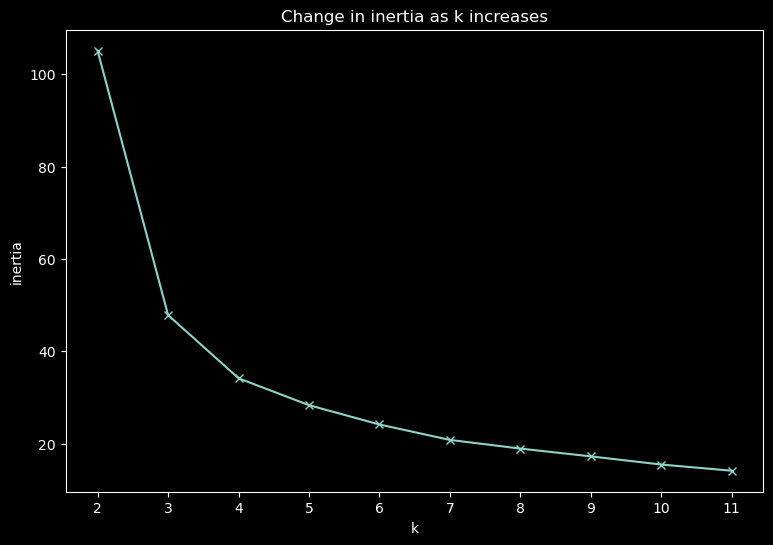

In [142]:
plt.figure(figsize=(9, 6)) # creating the figuer
pd.Series({k: KMeans(k).fit(u).inertia_ for k in range(2, 12)}).plot(marker='x') 
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')

In [143]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(u)

kmeans.predict(u)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [144]:
iris['cluster_u'] = kmeans.predict(u)

iris.sample(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster_sepal,cluster_u
117,6.5,3.0,5.5,1.8,virginica,1,2
140,6.9,3.1,5.4,2.1,virginica,1,2
66,6.7,3.1,4.4,1.4,versicolor,1,0


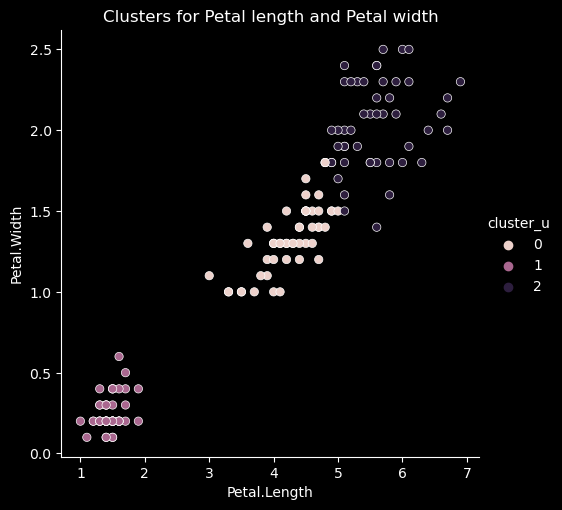

In [145]:
sns.relplot(data=iris, x="Petal.Length", y="Petal.Width", hue="cluster_u")
plt.title('Clusters for Petal length and Petal width')
plt.show()

# Q2 
- Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [146]:
def get_mall_data(file_name="mall.csv") -> pd.DataFrame:
    if os.path.isfile(file_name):
        return pd.read_csv(file_name)
    query = """select * from customers
            """
    connection = get_connection("mall_customers")
    df = pd.read_sql(query, connection)
    df.to_csv(file_name, index=False)
    return df

### Acquire

In [147]:
df = get_mall_data()

df.head(3)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


### Split

In [148]:
def split_data(df: pd.DataFrame) -> pd.DataFrame: # add to wrangle 
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate,
                                       test_size=.3,
                                       random_state=123)
    return train, validate, test

def view_split(train, validate, test):
    ''''''
    print(f'train    -> {train.shape}')
    print(f'validate -> {validate.shape}')
    print(f'test     -> {test.shape}')

In [149]:
train, validate, test = split_data(df)

view_split(train, validate, test)

train    -> (112, 5)
validate -> (48, 5)
test     -> (40, 5)


In [150]:
train.head(3)

,customer_id,gender,age,annual_income,spending_score
123,124,Male,39,69,91
76,77,Female,45,54,53
171,172,Male,28,87,75


### Scale data

In [151]:
mms = MinMaxScaler()
mms.fit(train[['age', 'spending_score']])
train_scaled = mms.transform(train[['age', 'spending_score']])  

train_scaled[:10]

array([[0.40384615, 0.95744681],
       [0.51923077, 0.55319149],
       [0.19230769, 0.78723404],
       [0.94230769, 0.13829787],
       [0.05769231, 0.85106383],
       [0.03846154, 0.78723404],
       [0.57692308, 0.43617021],
       [0.98076923, 0.4787234 ],
       [0.15384615, 0.57446809],
       [0.59615385, 0.28723404]])

In [152]:
cols_to_scale = df[['age', 'spending_score']]
mms = MinMaxScaler()

scale_train_data(train, validate, test, cols_to_scale= cols_to_scale, scale= mms, return_scaler=False)

ValueError: Boolean array expected for the condition, not int64

### Explore

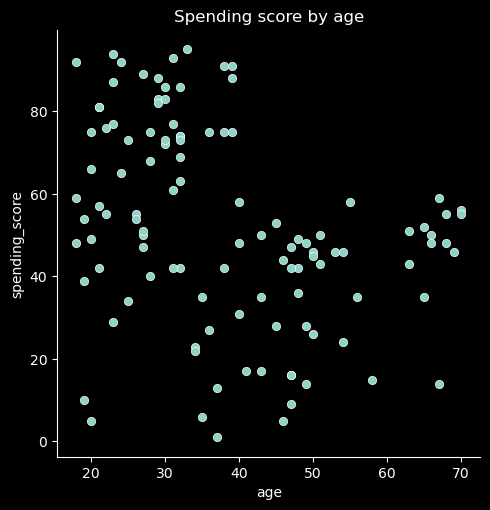

In [ ]:
sns.relplot(data=train, x='age', y='spending_score')
plt.title('Spending score by age')
plt.show()


In [ ]:
train['spending_bins'] = pd.cut(train.age,[0,35,60,100], labels=['35_and_below','36_to_60', '61_and_over'])

train.head(3)


,customer_id,gender,age,annual_income,spending_score,spending_bins
123,124,Male,39,69,91,36_to_60
76,77,Female,45,54,53,36_to_60
171,172,Male,28,87,75,35_and_below


### Cluster

In [ ]:
p = train[["age", "spending_score"]]

p.head()

,age,spending_score
123,39,91
76,45,53
171,28,75
10,67,14
35,21,81


Text(0.5, 1.0, 'Change in inertia as k increases')

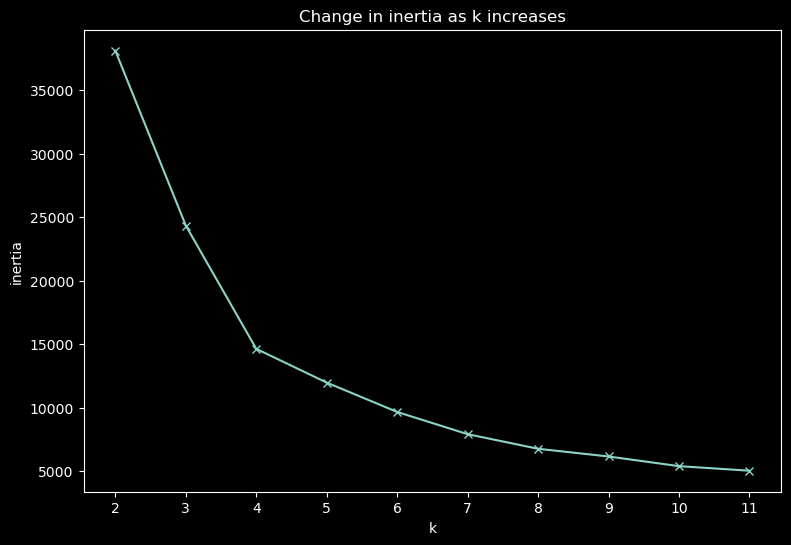

In [ ]:
plt.figure(figsize=(9, 6)) # creating the figuer
pd.Series({k: KMeans(k).fit(p).inertia_ for k in range(2, 12)}).plot(marker='x') 
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(p)

kmeans.predict(p)

array([2, 1, 2, 3, 2, 2, 1, 1, 0, 3, 1, 0, 2, 3, 3, 0, 0, 3, 1, 2, 2, 3,
       1, 1, 1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 1, 3, 0, 0, 1, 2, 3, 3, 0,
       3, 2, 2, 0, 2, 2, 1, 3, 0, 0, 3, 1, 2, 2, 0, 3, 0, 3, 0, 0, 0, 1,
       0, 1, 2, 2, 2, 0, 3, 1, 3, 3, 1, 2, 3, 2, 2, 1, 0, 2, 0, 0, 1, 1,
       2, 0, 2, 2, 2, 1, 2, 1, 0, 2, 1, 3, 3, 1, 1, 0, 1, 1, 1, 2, 1, 3,
       0, 3], dtype=int32)

In [ ]:
train['cluster_p'] = kmeans.predict(p)

train.sample(3)

,customer_id,gender,age,annual_income,spending_score,spending_bins,cluster_p
59,60,Male,53,46,46,36_to_60,1
84,85,Female,21,54,57,35_and_below,0
159,160,Female,30,78,73,35_and_below,2


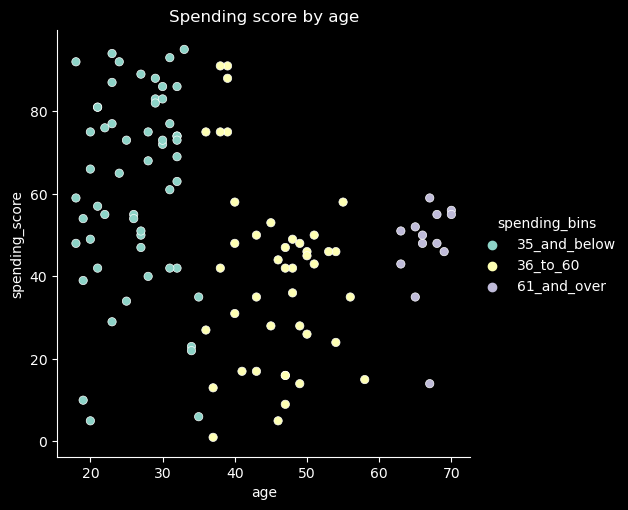

In [ ]:
sns.relplot(data=train, x='age', y='spending_score', hue='spending_bins')
plt.title('Spending score by age')
plt.show()


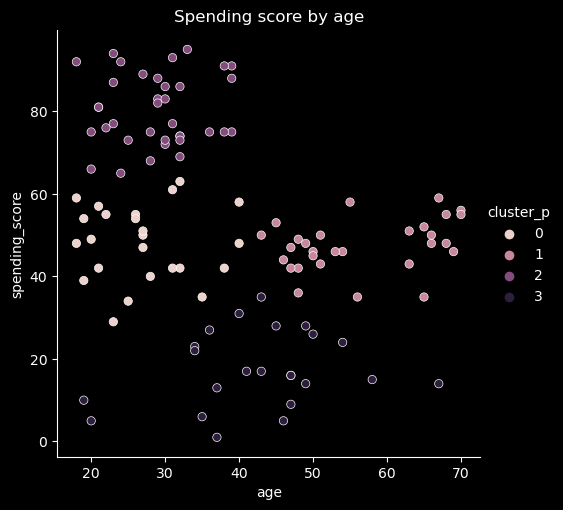

In [ ]:
sns.relplot(data=train, x='age', y='spending_score', hue='cluster_p')
plt.title('Spending score by age')
plt.show()

# Q3 
- How does scaling impact the results of clustering?

- Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [ ]:

def split_X(df):
    '''takes in the train data frame and splits it into y train, y validate, y test'''
    X_train = df.drop(columns=['gender', 'customer_id', 'annual_income', 'spending_score', 'spending_bins'])
    X_validate = df.drop(columns=['gender', 'customer_id', 'annual_income', 'spending_score', 'spending_bins'])
    X_test = df.drop(columns=['gender', 'customer_id', 'annual_income', 'spending_score', 'spending_bins'])
    return X_train, X_validate, X_test

def split_y(df):
    '''takes in the train data frame and splits it into X train, X, validate, X test'''
    y_train = df.spending_score
    y_validate = df.spending_score
    y_test = df.spending_score
    return y_train, y_validate, y_test

In [ ]:
X_train, X_validate, X_test = split_X(train)
X_train.head()


,age,cluster_p
123,39,2
76,45,1
171,28,2
10,67,3
35,21,2


Text(0.5, 1.0, 'Scaled')

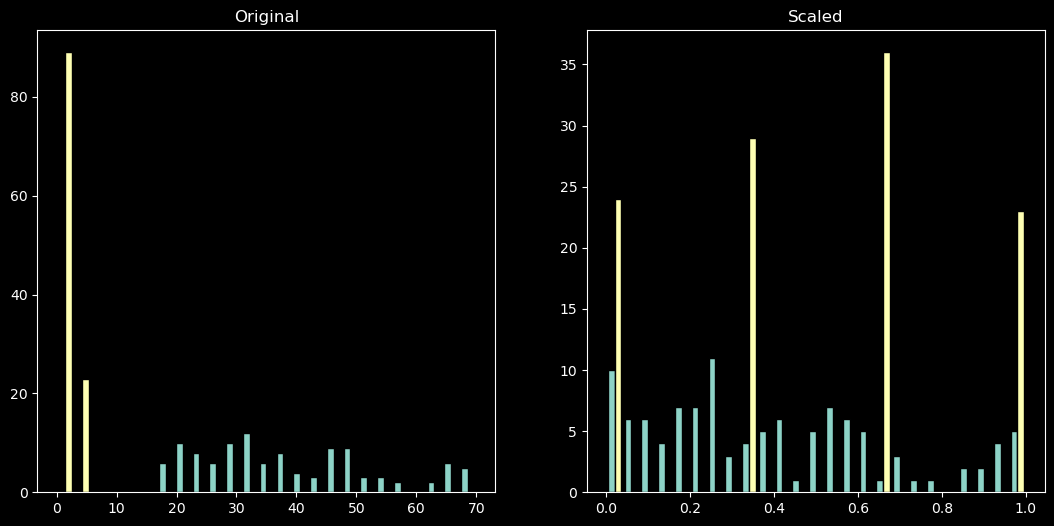

In [ ]:
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
mms.fit(X_train)

x_train_scaled = mms.transform(X_train)
x_validate_scaled = mms.transform(X_validate)
x_test_scaled = mms.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')


In [153]:
x = pd.DataFrame(x_train_scaled, columns=['age', 'bin'])

x.head()

,age,bin
0,0.403846,0.666667
1,0.519231,0.333333
2,0.192308,0.666667
3,0.942308,1.000000
4,0.057692,0.666667


Text(0.5, 1.0, 'Change in inertia as k increases')

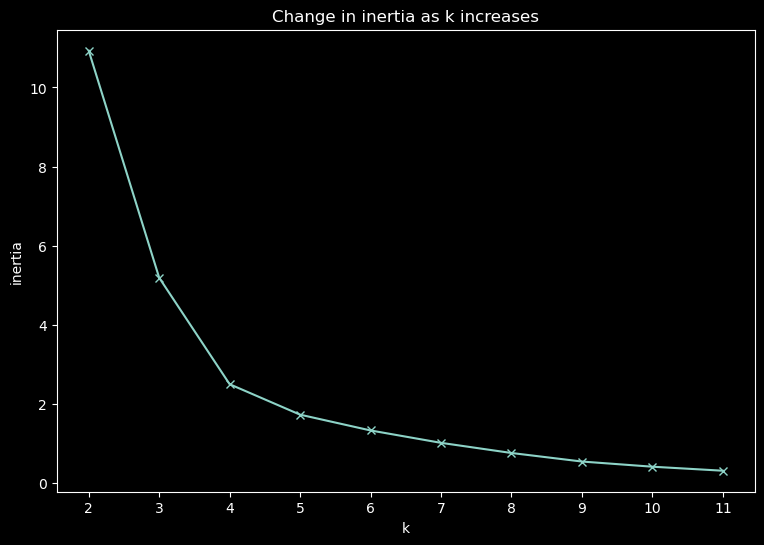

In [154]:
plt.figure(figsize=(9, 6)) # creating the figuer
pd.Series({k: KMeans(k).fit(x).inertia_ for k in range(2, 12)}).plot(marker='x') 
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')

In [155]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)

kmeans.predict(x)

array([1, 0, 1, 3, 1, 1, 0, 0, 2, 3, 0, 2, 1, 3, 1, 2, 2, 3, 0, 1, 1, 3,
       0, 0, 0, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 0, 3, 2, 2, 0, 1, 3, 1, 2,
       3, 1, 1, 2, 1, 1, 0, 3, 2, 2, 3, 0, 1, 1, 2, 3, 2, 3, 2, 2, 2, 0,
       2, 0, 1, 1, 1, 2, 3, 0, 3, 3, 0, 1, 3, 1, 1, 0, 2, 1, 2, 2, 0, 0,
       1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 0, 3, 3, 0, 0, 2, 0, 0, 0, 1, 0, 3,
       2, 3], dtype=int32)

In [156]:
x['cluster_pp'] = kmeans.predict(x)

x.sample(3)

,age,bin,cluster_pp
110,0.038462,0.000000,2
35,0.576923,0.333333,0
27,0.346154,1.000000,3


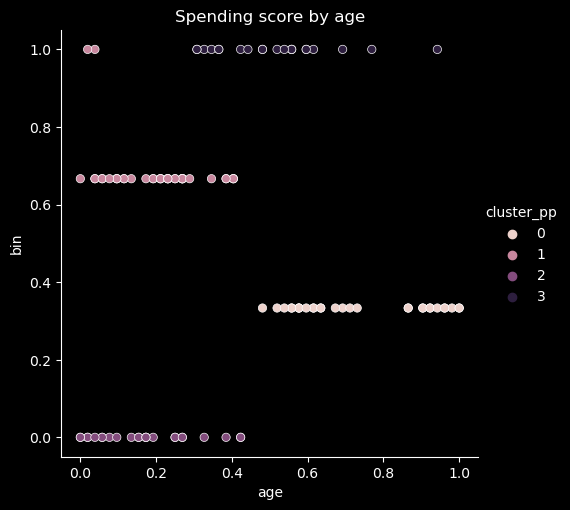

In [157]:
sns.relplot(data=x, x='age', y='bin', hue='cluster_pp')
plt.title('Spending score by age')
plt.show()